#### Name: Shiavm Rajaram Shinde
#### Roll No.: 180
#### Div: CV1 

# **Computer Vision Assignment No. 1**
Problem Statement : Average Filter (3x3, 5x5, 11x11, and 15x15). Analysis of using avg filters with different kernel sizes. Adding Salt and Pepper noise. Removing noise using a median filter with different kernel sizes. Analysis of using Gaussian kernels with different kernel sizes for Blur effect.

## 1)Average Filter (3x3, 5x5, 11x11, and 15x15). Analysis of using avg filters with different kernel sizes. 

In [7]:
from __future__ import division
import numpy as np
import cv2
import matplotlib.pyplot as plt
from random import randint as randi
import math
import pywt

In [9]:
def AvgFilter(Image, kSizeX, kSizeY):
    Result = np.zeros((Image.shape[0], Image.shape[1]), dtype=np.uint8)
    kCenterX = kSizeX//2
    kCenterY = kSizeY//2

    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            num = 0
            for k in range(kSizeX):
                for l in range(kSizeY):
                    row = i - kCenterX + k
                    col = j - kCenterY + l
                    # print(row, col)
                    if ( row >= 0 and row < Image.shape[0] and col >= 0 and col < Image.shape[1] ):
                        num += Image[row, col]
            Result[i, j] = num/(kSizeX * kSizeY)
    return Result

In [8]:
def ShowResults(original, result, title):
    plt.subplot(121),plt.imshow(original),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(result),plt.title(title)
    plt.xticks([]), plt.yticks([])

In [10]:
Image = cv2.imread('input-image-of-wood.jpg', 0) # 1, 0, -1
print("Image.shape", Image.shape)

Image.shape (426, 640)


### Average Filter of 3x3 

[[ 69 101 103 ... 103 108  75]
 [101 150 153 ... 157 163 111]
 [ 96 144 145 ... 148 153 106]
 ...
 [ 63  95  93 ...  77  73  47]
 [ 64  94  93 ...  75  72  44]
 [ 44  66  64 ...  49  47  28]]


-1

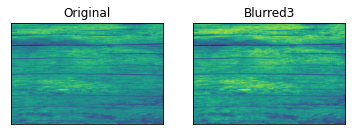

In [7]:
resultImage = AvgFilter(Image, 3, 3)
print(resultImage)
cv2.imshow('myimage3', resultImage)
ShowResults(Image, resultImage, "Blurred3")

cv2.imwrite("original3.png", Image)
cv2.imwrite("blur3.png", resultImage)
cv2.imshow("result3", resultImage)
cv2.waitKey(0)

### Average Filter of 5x5

[[ 54  73  91 ...  96  78  58]
 [ 69  93 118 ... 120  98  74]
 [ 86 115 145 ... 153 126  95]
 ...
 [ 59  79  99 ...  69  56  41]
 [ 46  61  76 ...  56  45  33]
 [ 33  45  55 ...  43  34  25]]


-1

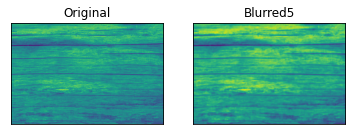

In [8]:
resultImage = AvgFilter(Image, 5, 5)
print(resultImage)
cv2.imshow('myimage5', resultImage)
ShowResults(Image, resultImage, "Blurred5")

cv2.imwrite("original5.png", Image)
cv2.imwrite("blur5.png", resultImage)
cv2.imshow("result5", resultImage)
cv2.waitKey(0)

### Average Filter of 11x11 

[[42 49 55 ... 60 52 45]
 [46 54 62 ... 71 62 53]
 [52 61 69 ... 80 70 60]
 ...
 [40 46 53 ... 35 31 27]
 [34 40 46 ... 32 28 25]
 [29 34 39 ... 25 22 20]]


-1

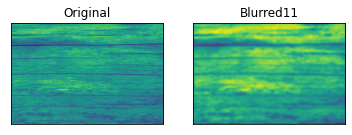

In [9]:
resultImage = AvgFilter(Image, 11, 11)
print(resultImage)
cv2.imshow('myimage11', resultImage)
ShowResults(Image, resultImage, "Blurred11")

cv2.imwrite("original11.png", Image)
cv2.imwrite("blur11.png", resultImage)
cv2.imshow("result11", resultImage)
cv2.waitKey(0)

### Average Filter of 15x15

[[37 41 46 ... 54 49 43]
 [41 46 51 ... 62 55 49]
 [48 53 59 ... 67 60 53]
 ...
 [36 41 45 ... 31 28 25]
 [32 36 40 ... 26 24 21]
 [28 32 36 ... 23 21 18]]


-1

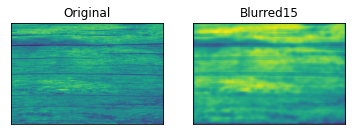

In [10]:
resultImage = AvgFilter(Image, 15, 15)
print(resultImage)
cv2.imshow('myimage15', resultImage)
ShowResults(Image, resultImage, "Blurred15")

cv2.imwrite("original15.png", Image)
cv2.imwrite("blur15.png", resultImage)
cv2.imshow("result15", resultImage)
cv2.waitKey(0)

## Result Analysis: On increasing kernel size, the resulting image has less high frequency and less noise. On increasing kernel size image gets smoother. Edge details are not preserved.

## 2) Adding Salt and Pepper noise. Removing noise using a median filter with different kernel sizes.

In [11]:
def SaltAndPepperNoise(image, Percentage):
    Pixels = (image.shape[0]*image.shape[1] * Percentage)//100
    # print(Pixels, image.shape[0]*image.shape[1])
    pairs = []
    i=0
    Result = np.copy(image)

    while i < Pixels:
        x = randi(0, image.shape[0]-1)
        y = randi(0, image.shape[1]-1)
        z = randi(0, 255)
        if (x, y) not in pairs:
            Result[x, y] = z
            pairs.append((x, y))
        else:
            continue
        i += 1
    return Result

In [12]:
Image2 = cv2.imread('image_2.png', 0)
print("Image.shape", Image2.shape)

Image.shape (220, 220)


### 10% Salt and Paper Noise

True

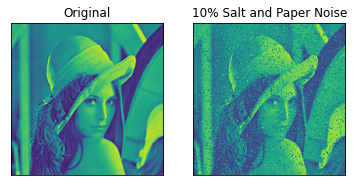

In [13]:
result = SaltAndPepperNoise(Image2, 10)
cv2.imshow('image_210', result)
ShowResults(Image2, result, "10% Salt and Paper Noise")
cv2.imwrite("original10.png", Image2)
cv2.imwrite("SaltAndPepper10.png", result)

In [2]:
def MedianFilter(image, kSizeX, kSizeY):
    Result = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    kCenterX = kSizeX//2
    kCenterY = kSizeY//2

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            num = []
            for k in range(kSizeX):
                for l in range(kSizeY):
                    row = i - kCenterX + k
                    col = j - kCenterY + l
                    # print(row, col)
                    if ( row >= 0 and row < image.shape[0] and col >= 0 and col < image.shape[1] ):
                        num.append(image[row, col])
            num.sort()
            Result[i, j] = num[len(num)//2]
    return Result

### Median Filtering on 10% Salt and Pepper Noise Image


#### Kernel Size 3x3 

True

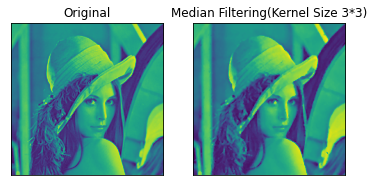

In [15]:
result2 = MedianFilter(result, 3, 3)
cv2.imshow('medianimage33', result2)
ShowResults(Image2, result2, "Median Filtering(Kernel Size 3*3)")
cv2.imwrite("MedianFilter.png", result2)

#### Kernel Size 5x5 

True

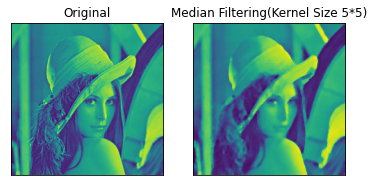

In [16]:
result3 = MedianFilter(result, 5, 5)
cv2.imshow('medianimage55', result3)
ShowResults(Image2, result3, "Median Filtering(Kernel Size 5*5)")
cv2.imwrite("MedianFilter55.png", result3)

#### Kernel Size 11x11 

True

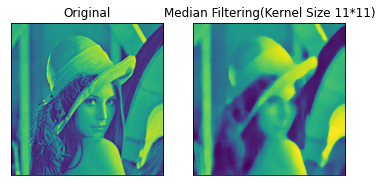

In [17]:
result4 = MedianFilter(result, 11, 11)
cv2.imshow('medianimage1111', result4)
ShowResults(Image2, result4, "Median Filtering(Kernel Size 11*11)")
cv2.imwrite("MedianFilter1111.png", result4)

### 20% Salt and Paper Noise

True

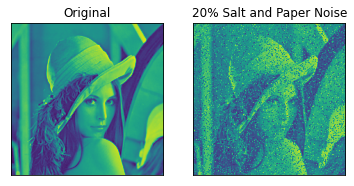

In [19]:
result5 = SaltAndPepperNoise(Image2, 20)
cv2.imshow('image_220', result5)
ShowResults(Image2, result5, "20% Salt and Paper Noise")
cv2.imwrite("original20.png", Image2)
cv2.imwrite("SaltAndPepper20.png", result5)

### Median Filtering on 20% Salt and Pepper Noise Image


#### Kernel Size 3x3 

True

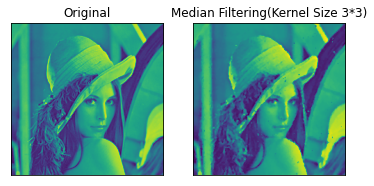

In [20]:
result7 = MedianFilter(result5, 3, 3)
cv2.imshow('medianimage203', result7)
ShowResults(Image2, result7, "Median Filtering(Kernel Size 3*3)")
cv2.imwrite("MedianFilter203.png", result7)

#### Kernel Size 5x5

True

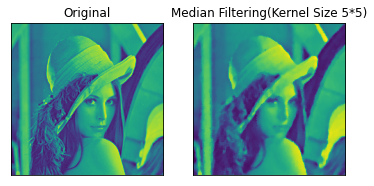

In [21]:
result8 = MedianFilter(result5, 5, 5)
cv2.imshow('medianimage205', result8)
ShowResults(Image2, result8, "Median Filtering(Kernel Size 5*5)")
cv2.imwrite("MedianFilter205.png", result8)

#### Kernel Size 11x11 

True

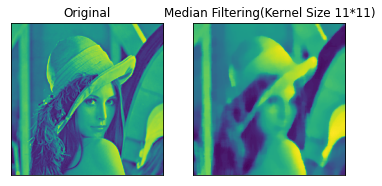

In [22]:
result9 = MedianFilter(result5, 11, 11)
cv2.imshow('medianimage2011', result9)
ShowResults(Image2, result9, "Median Filtering(Kernel Size 11*11)")
cv2.imwrite("MedianFilter2011.png", result9)

## Result Analysis: On increasing kernel size, image quality is degraded. It seems like median filter is not good for images with high noise. On increasing kernel size image gets smoother. But median filter is better than Average filter on preserving edge details.


## 3) Analysis of using Gaussian kernels with different kernel sizes for Blur effect. 

In [26]:
def GaussianValue(x, y, var=1.0):
    s = 2.0*var*var
    val = math.exp(-((x*x+y*y) /s ))
    den = math.pi * s
    return val/den

def MyGaussianKernel(kSizeX, kSizeY, var):
    kernel = np.zeros((kSizeX, kSizeY))
    kCenterX = kSizeX//2
    kCenterY = kSizeY//2
    total = 0.0
    for i in range(kSizeX):
        for j in range(kSizeY):
            x = i - kCenterX
            y = j - kCenterY
            val = GaussianValue(x, y, var)
            kernel[i, j] = val
            total += val
    kernel = kernel/total
    return kernel

def GaussianFilter(image, kernel, kSizeX, kSizeY):
    Result = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    kCenterX = kSizeX//2
    kCenterY = kSizeY//2

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # for m in range(3):
            num = 0.0
            for k in range(kSizeX):
                for l in range(kSizeY):
                    row = i - kCenterX + k
                    col = j - kCenterY + l
                    # print(row, col)
                    if ( row >= 0 and row < image.shape[0] and col >= 0 and col < image.shape[1] ):
                        num += image[row, col]*kernel[k ,l]
            Result[i, j] = num
    return Result

In [24]:
Image3 = cv2.imread('image_3.png', 0)
print(Image3.shape)

(512, 512)


#### Gaussian Filter Kernel 3x3, 𝜎 = 1

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


True

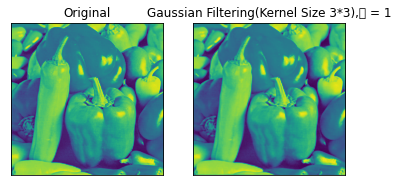

In [32]:
kSize = 3
kernel = MyGaussianKernel(kSize, kSize, 1)
print(kernel)
result11 = GaussianFilter(Image3, kernel, kSize, kSize)
cv2.imshow('GaussianImage', result11)
ShowResults(Image3, result11, "Gaussian Filtering(Kernel Size 3*3),𝜎 = 1")
cv2.imwrite("original.png", Image3)
cv2.imwrite("Gaussian13.png", result11)

#### Gaussian Filter Kernel 5x5, 𝜎 = 3

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


True

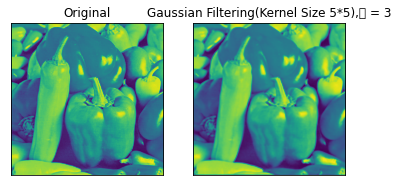

In [31]:
kSize = 5
kernel = MyGaussianKernel(kSize, kSize, 3)
print(kernel)
result12 = GaussianFilter(Image3, kernel, kSize, kSize)
cv2.imshow('GaussianImage', result12)
ShowResults(Image3, result12, "Gaussian Filtering(Kernel Size 5*5),𝜎 = 3")
cv2.imwrite("original.png", Image3)
cv2.imwrite("Gaussian35.png", result12)

#### Gaussian Filter Kernel 11x11, 𝜎 = 4

[[0.00301223 0.00399056 0.00496633 0.00580623 0.00637689 0.00657932
  0.00637689 0.00580623 0.00496633 0.00399056 0.00301223]
 [0.00399056 0.00528663 0.00657932 0.007692   0.00844801 0.00871618
  0.00844801 0.007692   0.00657932 0.00528663 0.00399056]
 [0.00496633 0.00657932 0.00818809 0.00957285 0.01051372 0.01084746
  0.01051372 0.00957285 0.00818809 0.00657932 0.00496633]
 [0.00580623 0.007692   0.00957285 0.0111918  0.01229178 0.01268197
  0.01229178 0.0111918  0.00957285 0.007692   0.00580623]
 [0.00637689 0.00844801 0.01051372 0.01229178 0.01349988 0.01392842
  0.01349988 0.01229178 0.01051372 0.00844801 0.00637689]
 [0.00657932 0.00871618 0.01084746 0.01268197 0.01392842 0.01437055
  0.01392842 0.01268197 0.01084746 0.00871618 0.00657932]
 [0.00637689 0.00844801 0.01051372 0.01229178 0.01349988 0.01392842
  0.01349988 0.01229178 0.01051372 0.00844801 0.00637689]
 [0.00580623 0.007692   0.00957285 0.0111918  0.01229178 0.01268197
  0.01229178 0.0111918  0.00957285 0.007692   0.00

True

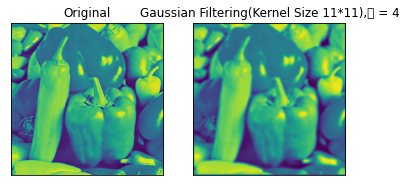

In [33]:
kSize = 11
kernel = MyGaussianKernel(kSize, kSize, 4)
print(kernel)
result13 = GaussianFilter(Image3, kernel, kSize, kSize)
cv2.imshow('GaussianImage', result13)
ShowResults(Image3, result13, "Gaussian Filtering(Kernel Size 11*11),𝜎 = 4")
cv2.imwrite("original.png", Image3)
cv2.imwrite("Gaussian411.png", result13)

#### Gaussian Filter Kernel 15x15, 𝜎 = 7

[[0.00232797 0.00265821 0.00297397 0.00326002 0.0035014  0.00368467
  0.00379922 0.00383818 0.00379922 0.00368467 0.0035014  0.00326002
  0.00297397 0.00265821 0.00232797]
 [0.00265821 0.00303528 0.00339583 0.00372247 0.00399808 0.00420736
  0.00433815 0.00438264 0.00433815 0.00420736 0.00399808 0.00372247
  0.00339583 0.00303528 0.00265821]
 [0.00297397 0.00339583 0.00379922 0.00416465 0.004473   0.00470714
  0.00485346 0.00490324 0.00485346 0.00470714 0.004473   0.00416465
  0.00379922 0.00339583 0.00297397]
 [0.00326002 0.00372247 0.00416465 0.00456523 0.00490324 0.0051599
  0.0053203  0.00537486 0.0053203  0.0051599  0.00490324 0.00456523
  0.00416465 0.00372247 0.00326002]
 [0.0035014  0.00399808 0.004473   0.00490324 0.00526628 0.00554195
  0.00571422 0.00577283 0.00571422 0.00554195 0.00526628 0.00490324
  0.004473   0.00399808 0.0035014 ]
 [0.00368467 0.00420736 0.00470714 0.0051599  0.00554195 0.00583203
  0.00601333 0.006075   0.00601333 0.00583203 0.00554195 0.0051599
  0.00

True

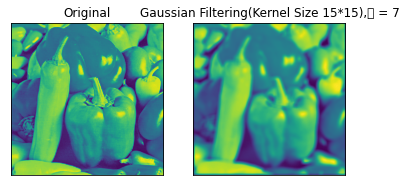

In [34]:
kSize = 15
kernel = MyGaussianKernel(kSize, kSize, 7)
print(kernel)
result14 = GaussianFilter(Image3, kernel, kSize, kSize)
cv2.imshow('GaussianImage', result14)
ShowResults(Image3, result14, "Gaussian Filtering(Kernel Size 15*15),𝜎 = 7")
cv2.imwrite("original.png", Image3)
cv2.imwrite("Gaussian715.png", result14)

## Result Analysis: Pixel gets more spread out in gaussian on increasing kernel size. Image get much smoother. On increasing kernel size of pixels also increase. Thus creating more blurriness in the image. It also reduces high frequency details significantly on increasing kernel size. 